In [1]:
# multivariate lstm example
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [2]:
#for dataset
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.varmax import VARMAX
import numpy as np
from statsmodels.tsa.stattools import adfuller
from sklearn import metrics
from timeit import default_timer as timer
import warnings
warnings.filterwarnings("ignore")


from sklearn import svm, datasets 
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import numpy as np
import pandas as pd

In [3]:
from  glassnode  import  GlassnodeClient
import pandas as pd

api_key = "24vuPNOyd3ciclDMDBqFCoQFykc"
client = GlassnodeClient(api_key)
since = 1546272000 # 1 1 2019
until = 1646064000 # 1 3 2022
resolution = "24h"
params = {"a": "BTC", "s": since, "u": until, "i": resolution}
indlist = [['market','price_usd_close'],
          ['addresses','min_1_count'],
          ['addresses','min_10_count'],
          ['addresses','min_100_count'],
          ['addresses','min_1k_count'],
          ['addresses','min_10k_count'],
          ['addresses','active_count'],
          ['addresses','new_non_zero_count'],
           ['addresses','receiving_count'],
           #cant use
           ['distribution','supply_contracts'],
           ['distribution','balance_exchanges'],
           ['distribution','balance_exchanges_relative'],
           ['distribution','exchange_net_position_change'],
           #cant use
           ['supply','rcap_hodl_waves'],
           ['supply','active_3m_6m'],
           ['supply','active_6m_12m'],
           ['supply','active_1y_2y'],
           ['supply','active_2y_3y'],
           ['supply','active_3y_5y'],
           ['supply','profit_relative'],
           ['supply','profit_sum'],
           ['supply','loss_sum'],
           #do not have this data
           ['supply','sth_lth_realized_value_ratio'],
           #cant use
           ['transactions','count'],
           ['transactions','transfers_volume_exchanges_net'],
           ['market','mvrv'],
           ['market','mvrv_z_score'],
           ['market','marketcap_realized_usd'],
           ['indicators','pi_cycle_top'],
           ['indicators','net_unrealized_profit_loss'],
           ['indicators','seller_exhaustion_constant'],
           ['indicators','realized_profits_to_value_ratio'],
           ['indicators','realized_profit'],
           ['indicators','realized_loss'],
           ['indicators','ssr'],
           ['indicators','ssr_oscillator'],
           ['lightning','network_capacity_sum'],
           #cant use this data
           ['protocols','uniswap_volume_sum']
           #['',''],          
          ]


def data_from_api(indlist):
    data=[]
    for i in range(len(indlist)):
        try:
            label = indlist[i][1]
            db = client.get(indlist[i][0],indlist[i][1],params)
            #convert from list of dictionaries to data frame
            df = pd.DataFrame.from_dict(db,orient='columns')
            #setup columns name
            df.columns=['time',label]
            #fixed index
            df.set_index('time', inplace = True)
            data.append(df)
            data_df = pd.concat(data,axis = 1)
        except:
            print('data can be used',label)
    data_df['time'] = data_df.index
    data_df['time_real'] = pd.to_datetime(data_df['time'],unit = 's')
    #set time as the first columns
    data_df= data_df[['time_real']+[col for col in data_df if col != 'time']]
 #   df = df[ ['mean'] + [ col for col in df.columns if col != 'mean' ] ]
    return data_df


In [4]:
df_raw = data_from_api(indlist)
df_raw.head(10)

data can be used supply_contracts
data can be used sth_lth_realized_value_ratio
data can be used uniswap_volume_sum


,time_real,price_usd_close,min_1_count,min_10_count,min_100_count,min_1k_count,min_10k_count,active_count,new_non_zero_count,receiving_count,...,pi_cycle_top,net_unrealized_profit_loss,seller_exhaustion_constant,realized_profits_to_value_ratio,realized_profit,realized_loss,ssr,ssr_oscillator,network_capacity_sum,time_real
time,,,,,,,,,,,,,,,,,,,,,
1546214400,2018-12-31,3741.296795,702701,149351,16626,1846,98,553993,264907,391023,...,"{'ma111': 5440.325949853504, 'ma350x2': 14506....",-0.216829,0.031358,0.000088,6.979245e+06,1.031993e+08,"{'h': 55.27779169912958, 'l': 23.3046610128346...",-1.837116,504.320835,2018-12-31
1546300800,2019-01-01,3840.959249,703016,149464,16623,1848,98,430421,204562,310117,...,"{'ma111': 5417.294731195769, 'ma350x2': 14458....",-0.184430,0.032854,0.000091,7.233116e+06,5.380244e+07,"{'h': 55.312548274927806, 'l': 23.102144876226...",-1.741016,525.802966,2019-01-01
1546387200,2019-01-02,3943.289843,703838,149314,16614,1844,98,585888,286954,415822,...,"{'ma111': 5393.909856409303, 'ma350x2': 14419....",-0.156480,0.033121,0.000307,2.440749e+07,4.148240e+07,"{'h': 55.34534661376828, 'l': 22.9132043187368...",-1.665698,532.642408,2019-01-02
1546473600,2019-01-03,3836.558048,705024,149727,16613,1844,98,602487,312525,450616,...,"{'ma111': 5370.173380533358, 'ma350x2': 14375....",-0.185402,0.030455,0.000203,1.614928e+07,8.678208e+07,"{'h': 55.386560544893996, 'l': 22.710854967934...",-1.734294,539.360233,2019-01-03
1546560000,2019-01-04,3858.238280,705187,149698,16628,1843,98,588143,300809,454714,...,"{'ma111': 5345.845556755486, 'ma350x2': 14332....",-0.177968,0.031749,0.000144,1.143082e+07,5.223457e+07,"{'h': 55.41026424427746, 'l': 22.5132389731566...",-1.686183,544.086001,2019-01-04
1546646400,2019-01-05,3841.061170,705262,149766,16622,1841,98,510108,266560,385492,...,"{'ma111': 5322.169902414248, 'ma350x2': 14283....",-0.182782,0.030916,0.000148,1.174129e+07,2.320862e+07,"{'h': 55.43271976439541, 'l': 22.3132730577903...",-1.690980,548.807469,2019-01-05
1546732800,2019-01-06,4076.203320,705635,149832,16630,1839,98,513094,264515,389274,...,"{'ma111': 5299.577049231217, 'ma350x2': 14237....",-0.113925,0.035484,0.000223,1.773132e+07,6.210415e+07,"{'h': 55.43705027642679, 'l': 22.1441407997281...",-1.509967,555.744056,2019-01-06
1546819200,2019-01-07,4024.462066,706061,149856,16649,1844,97,605722,308682,448075,...,"{'ma111': 5279.123994099827, 'ma350x2': 14197....",-0.127613,0.033705,0.000561,4.448689e+07,6.564099e+07,"{'h': 55.4433023251821, 'l': 21.97393990660751...",-1.511512,558.886788,2019-01-07
1546905600,2019-01-08,4033.554754,706204,149944,16653,1843,97,618858,324750,465067,...,"{'ma111': 5258.192682260209, 'ma350x2': 14159....",-0.125368,0.034222,0.000278,2.202910e+07,8.816095e+07,"{'h': 55.47908033499091, 'l': 21.8136919515238...",-1.520907,560.375822,2019-01-08


In [5]:
# 选出 'rcap_hodl_waves','pi_cycle_top','ssr' 中的数据
df = df_raw.iloc[:,:].drop(columns = ['rcap_hodl_waves','pi_cycle_top','ssr'])

#features 处理
df['1_10_address'] =   df['min_1_count'] - df['min_10_count']
df['10-100-address'] = df['min_10_count'] - df['min_100_count']
df['100-1k-address'] = df['min_100_count'] - df['min_1k_count']
df['1k-10k-address'] = df['min_1k_count'] - df['min_10k_count']
df['10k+address'] =    df['min_10k_count']

df["per_1_d"] = df['price_usd_close'].pct_change(1)
df["per_3_d"] = df['price_usd_close'].pct_change(3)
df["per_7_d"] = df['price_usd_close'].pct_change(7)
df["per_15_d"] = df['price_usd_close'].pct_change(15)
df["per_30_d"] = df['price_usd_close'].pct_change(30)
df['price_back_1_d'] = df['price_usd_close'].shift(periods=1)
df['price_back_3_d'] = df['price_usd_close'].shift(periods=3)
df['price_back_7_d'] = df['price_usd_close'].shift(periods=7)
df['price_back_15_d'] = df['price_usd_close'].shift(periods=15)
df['price_back_30_d'] = df['price_usd_close'].shift(periods=30)
df['SMA_3'] = df['price_usd_close'].rolling(window=3).mean()
df['SMA_7'] = df['price_usd_close'].rolling(window=7).mean()
df['up_down'] = df["per_1_d"]
#condition = [(abs(df["per_1_d"])<0),(df["per_1_d"]>=0)]
condition = [(abs(df["per_1_d"])<0.005),(df["per_1_d"]<=-0.005),(df["per_1_d"]>=0.005)]
values = [-1,0,1]
import numpy as np
df['up_do_1d'] = np.select(condition,values)
#drop columns and store this dataset                                         
df1 = df.drop(['min_1_count','min_10_count','min_100_count','min_1k_count','min_10k_count'],axis=1)
#for SVM 1 day price prediction
df1 = df1.drop(['per_1_d','per_3_d','per_7_d','per_15_d','per_30_d','price_back_1_d','price_back_3_d','price_back_7_d','price_back_15_d','price_back_30_d'],axis=1)
#df1.iloc[30:,:]
#df1.to_csv(r'G:\MScProject\data\raw_add_col.csv')



In [6]:
# df1.set_index('time_real', inplace = True)
for col in df1.columns:
    print(col)
df1.head(10)

time_real
price_usd_close
active_count
new_non_zero_count
receiving_count
balance_exchanges
balance_exchanges_relative
exchange_net_position_change
active_3m_6m
active_6m_12m
active_1y_2y
active_2y_3y
active_3y_5y
profit_relative
profit_sum
loss_sum
count
transfers_volume_exchanges_net
mvrv
mvrv_z_score
marketcap_realized_usd
net_unrealized_profit_loss
seller_exhaustion_constant
realized_profits_to_value_ratio
realized_profit
realized_loss
ssr_oscillator
network_capacity_sum
time_real
1_10_address
10-100-address
100-1k-address
1k-10k-address
10k+address
SMA_3
SMA_7
up_down
up_do_1d


,time_real,price_usd_close,active_count,new_non_zero_count,receiving_count,balance_exchanges,balance_exchanges_relative,exchange_net_position_change,active_3m_6m,active_6m_12m,...,time_real,1_10_address,10-100-address,100-1k-address,1k-10k-address,10k+address,SMA_3,SMA_7,up_down,up_do_1d
time,,,,,,,,,,,,,,,,,,,,,
1546214400,2018-12-31,3741.296795,553993,264907,391023,2.769144e+06,0.158638,88231.509356,1.279000e+06,2.929466e+06,...,2018-12-31,553350,132725,14780,1748,98,NaN,NaN,NaN,0
1546300800,2019-01-01,3840.959249,430421,204562,310117,2.768345e+06,0.158575,86871.085578,1.280466e+06,2.908014e+06,...,2019-01-01,553552,132841,14775,1750,98,NaN,NaN,0.026638,1
1546387200,2019-01-02,3943.289843,585888,286954,415822,2.764221e+06,0.158322,81605.338292,1.258734e+06,2.913987e+06,...,2019-01-02,554524,132700,14770,1746,98,3841.848629,NaN,0.026642,1
1546473600,2019-01-03,3836.558048,602487,312525,450616,2.754308e+06,0.157737,69354.944423,1.251645e+06,2.899543e+06,...,2019-01-03,555297,133114,14769,1746,98,3873.602380,NaN,-0.027067,0
1546560000,2019-01-04,3858.238280,588143,300809,454714,2.757905e+06,0.157926,65661.622276,1.254295e+06,2.876563e+06,...,2019-01-04,555489,133070,14785,1745,98,3879.362057,NaN,0.005651,1
1546646400,2019-01-05,3841.061170,510108,266560,385492,2.763081e+06,0.158204,63579.188602,1.246993e+06,2.866121e+06,...,2019-01-05,555496,133144,14781,1743,98,3845.285833,NaN,-0.004452,-1
1546732800,2019-01-06,4076.203320,513094,264515,389274,2.766691e+06,0.158395,48330.876526,1.236735e+06,2.863502e+06,...,2019-01-06,555803,133202,14791,1741,98,3925.167590,3876.800958,0.061218,1
1546819200,2019-01-07,4024.462066,605722,308682,448075,2.766958e+06,0.158394,46314.881994,1.226954e+06,2.788592e+06,...,2019-01-07,556205,133207,14805,1747,97,3980.575519,3917.253140,-0.012693,0
1546905600,2019-01-08,4033.554754,618858,324750,465067,2.766451e+06,0.158346,47264.324523,1.227683e+06,2.782270e+06,...,2019-01-08,556260,133291,14810,1746,97,4044.740047,3944.766783,0.002259,-1


In [7]:
#select No NAN rows
df2 = df1.iloc[30:,]
#split price , data columns
df2_up_do_1d = df2['up_do_1d']
df2_price_usd_close = df2['price_usd_close']
df2_time_real = df2['time_real']
df2_up_down = df2['up_down']

df2 = df2.drop(['up_do_1d','time_real','up_down'],axis = 1)



In [8]:
#remove the first 30 rows and the first  columns
#papare for normlization
# df2 = df1.iloc[30:,1:-2]
#prediction feature
# pre_df = df1.iloc[30:,-1]
#papare dataset 
df2
# normaliztion
price_re = df2['price_usd_close'].max()-df2['price_usd_close'].min()
price_min = df2['price_usd_close'].min()
norm_df=(df2-df2.min())/(df2.max()-df2.min())
norm_df.head(10)
# norm_df.shape

# change the first 'price_usd_close' to the last column
norm_df= norm_df[[col for col in norm_df if col != 'price_usd_close']+['price_usd_close']]
norm_df.head(10)

#set number as  index
index = [x for x in range(len(norm_df))]


In [9]:
#set number as  index
index = [x for x in range(len(norm_df))]
index = pd.Index(index)
norm_df = norm_df.set_index(index)
norm_df

,active_count,new_non_zero_count,receiving_count,balance_exchanges,balance_exchanges_relative,exchange_net_position_change,active_3m_6m,active_6m_12m,active_1y_2y,active_2y_3y,...,ssr_oscillator,network_capacity_sum,1_10_address,10-100-address,100-1k-address,1k-10k-address,10k+address,SMA_3,SMA_7,price_usd_close
0,0.131128,0.222141,0.157291,0.375210,0.615796,0.427906,0.144897,0.426643,0.782853,0.022057,...,0.297781,0.000000,0.000000,0.427924,0.943516,0.051020,0.461538,0.000690,0.001365,0.001320
1,0.166722,0.262763,0.200676,0.394863,0.633637,0.470181,0.155905,0.421583,0.787319,0.021748,...,0.299730,0.004967,0.005693,0.353313,0.948290,0.053936,0.461538,0.000610,0.001024,0.000882
2,0.195515,0.250170,0.226422,0.398204,0.636276,0.490433,0.158051,0.416038,0.792775,0.022311,...,0.305066,0.006639,0.009118,0.353313,0.919650,0.049563,0.538462,0.000830,0.000763,0.001372
3,0.067233,0.154717,0.080558,0.389844,0.628062,0.506036,0.159534,0.411490,0.798721,0.022533,...,0.309808,0.008225,0.013052,0.351356,0.917263,0.051020,0.538462,0.001050,0.000590,0.001966
4,0.029465,0.110129,0.031463,0.392507,0.630130,0.499628,0.163028,0.408964,0.799654,0.027215,...,0.308203,0.008986,0.016706,0.354024,0.908512,0.052478,0.538462,0.001072,0.000302,0.000949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,0.415657,0.377742,0.432868,0.046169,0.012825,0.395456,0.247237,0.546775,0.561436,0.196948,...,0.273200,0.992257,0.898897,0.018141,0.028640,0.481050,0.102564,0.541386,0.570434,0.528305
1121,0.525857,0.436853,0.525781,0.048889,0.015009,0.407334,0.250632,0.535912,0.570643,0.195572,...,0.284152,0.988025,0.904667,0.029346,0.057279,0.466472,0.153846,0.548227,0.565266,0.543795
1122,0.507508,0.455410,0.544311,0.055170,0.020251,0.450273,0.255315,0.526577,0.575974,0.195347,...,0.295098,0.988191,0.908457,0.034771,0.063644,0.479592,0.128205,0.552998,0.563389,0.557984
1123,0.361338,0.315015,0.363388,0.058760,0.023191,0.511504,0.254838,0.520625,0.582512,0.195402,...,0.296383,0.990949,0.912017,0.033615,0.062848,0.481050,0.128205,0.562182,0.560902,0.555358


In [10]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences.iloc[i:end_ix, :-1], sequences.iloc[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)



In [11]:
n_steps = 2
X, y = split_sequences(norm_df, n_steps)
print(X.shape, y.shape)

(1124, 2, 33) (1124,)


In [12]:
#split train and test test
l = len(X)
X_train, X_test = X[:int(0.8*l)],X[int(0.8*l):]
y_train, y_test = y[:int(0.8*l)],y[int(0.8*l):]

In [13]:
# # # summarize the data
# for i in range(len(X)):
# 	print(X[i], y[i])

In [14]:
# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)

In [15]:
model.fit(X_train, y_train, epochs=200, verbose=0)


In [16]:
# demonstrate prediction
y_pred = model.predict(X_test, verbose=0)
# print(yhat)

In [17]:
test_index = index[int(0.8*l):]
len(y_test)
type(y_test)

numpy.ndarray

In [18]:
test_index = pd.DataFrame(test_index)
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)
result = pd.concat([test_index,y_test,y_pred],axis = 1)
result.columns = ['test_index','y_test','y_pred']
# ,columns = ['test_index','y_test','y_pred']
test_index = pd.Index(result.iloc[:,0])
result = result.set_index(test_index)
# result = result.iloc[:,1:]

In [19]:
result

,test_index,y_test,y_pred
test_index,,,
899,899,0.442662,0.439523
900,900,0.427394,0.417328
901,901,0.411015,0.410486
902,902,0.447605,0.439146
903,903,0.450667,0.442299
...,...,...,...
1120,1120,0.543795,0.532086
1121,1121,0.557984,0.548801
1122,1122,0.555358,0.550101


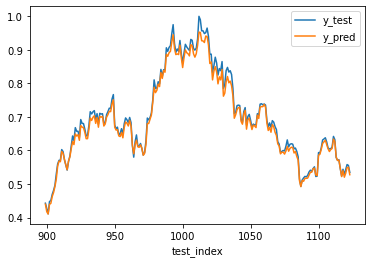

In [20]:
import matplotlib.pyplot as plt
# result.columns = ['test_index','y_test','y_pred']
result.plot(x="test_index", y=["y_test", "y_pred"])
plt.show()

In [21]:
# calculate manually
y = result['y_test']
yhat = result['y_pred']
d = y - yhat
mse_f = np.mean(d**2)
mae_f = np.mean(abs(d))
rmse_f = np.sqrt(mse_f)
r2_f = 1-(sum(d**2)/sum((y-np.mean(y))**2))

print("Results by manual calculation:")
print("MAE:",mae_f)
print("MSE:", mse_f)
print("RMSE:", rmse_f)
print("R-Squared:", r2_f)

Results by manual calculation:
MAE: 0.01113144277298236
MSE: 0.00018750639395586255
RMSE: 0.013693297409895928
R-Squared: nan


In [22]:
type(X)
X.shape

(1124, 2, 33)

In [23]:
re_result = result

In [24]:
re_result['y_pred'] = re_result['y_pred']* price_re + price_min

In [25]:
re_result['y_test'] = re_result['y_test']* price_re + price_min

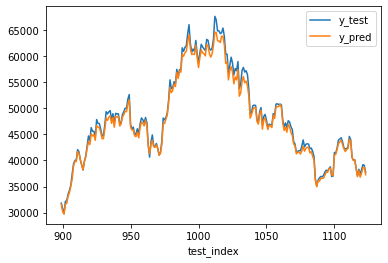

In [26]:
re_result.plot(x="test_index", y=["y_test", "y_pred"])
plt.show()

In [27]:
re_result[1:10]

,test_index,y_test,y_pred
test_index,,,
900,900,30834.368390,30188.199219
901,901,29783.011417,29749.037109
902,902,32131.635487,31588.697266
903,903,32328.209838,31791.041016
904,904,33498.822498,33094.222656
905,905,34265.556245,33859.570312
906,906,35242.644357,34999.183594
907,907,37401.188750,36454.109375
908,908,39315.132255,38905.113281


In [28]:
re_result["pre_next_d"] = re_result['y_pred'].pct_change(1)
condition = [(abs(re_result["pre_next_d"])<0.005),(re_result["pre_next_d"]<=-0.005),(re_result["pre_next_d"]>=0.005)]
values = [-1,0,1]
import numpy as np
re_result['pre_next_d'] = np.select(condition,values)


re_result["act_next_d"] = re_result['y_test'].pct_change(1)
condition = [(abs(re_result["act_next_d"])<0.005),(re_result["act_next_d"]<=-0.005),(re_result["act_next_d"]>=0.005)]
values = [-1,0,1]
import numpy as np
re_result['act_next_d'] = np.select(condition,values)

In [29]:
re_result
y_true=re_result['act_next_d']
y_pred=re_result['pre_next_d']
# y_true.astype(str)
# y_pred.astype(str)

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
re_result

,test_index,y_test,y_pred,pre_next_d,act_next_d
test_index,,,,,
899,899,31814.348278,31612.876953,0,0
900,900,30834.368390,30188.199219,0,0
901,901,29783.011417,29749.037109,0,0
902,902,32131.635487,31588.697266,1,1
903,903,32328.209838,31791.041016,1,1
...,...,...,...,...,...
1120,1120,38305.927763,37554.347656,1,1
1121,1121,39216.700438,38627.242188,1,1
1122,1122,39048.122275,38710.726562,-1,-1


In [31]:
conf_matrix = confusion_matrix(y_true=y_true, y_pred=y_pred)
acc = accuracy_score(y_true, y_pred)
f1_weight = f1_score(y_true, y_pred,average = 'weighted')
recall = recall_score(y_true, y_pred,average = 'weighted')
precision = precision_score(y_true, y_pred, average='weighted')
print(conf_matrix)
print('Accuracy: %.3f' % acc )
print('f1_weight: %.3f' % f1_weight )
print('recall: %.3f' % recall )
print('precision: %.3f' % precision )

[[22  5 14]
 [ 6 84  0]
 [ 9  0 86]]
Accuracy: 0.850
f1_weight: 0.847
recall: 0.850
precision: 0.845


In [32]:
conf_matrix

array([[22,  5, 14],
       [ 6, 84,  0],
       [ 9,  0, 86]], dtype=int64)

In [33]:
print
recall
# f1_weight

0.8495575221238938

In [34]:
print(y_true,y_pred)

test_index
899     0
900     0
901     0
902     1
903     1
       ..
1120    1
1121    1
1122   -1
1123    0
1124   -1
Name: act_next_d, Length: 226, dtype: int32 test_index
899     0
900     0
901     0
902     1
903     1
       ..
1120    1
1121    1
1122   -1
1123    0
1124   -1
Name: pre_next_d, Length: 226, dtype: int32


In [35]:
re_result['gap'] =  re_result['y_test'] - re_result['y_pred'] 
# re_result['gap'] = new
re_result
# error scaling
re_result['err_sca'] = re_result['gap']/re_result['y_test']
result

,test_index,y_test,y_pred,pre_next_d,act_next_d,gap,err_sca
test_index,,,,,,,
899,899,31814.348278,31612.876953,0,0,201.471325,0.006333
900,900,30834.368390,30188.199219,0,0,646.169171,0.020956
901,901,29783.011417,29749.037109,0,0,33.974308,0.001141
902,902,32131.635487,31588.697266,1,1,542.938221,0.016897
903,903,32328.209838,31791.041016,1,1,537.168822,0.016616
...,...,...,...,...,...,...,...
1120,1120,38305.927763,37554.347656,1,1,751.580107,0.019620
1121,1121,39216.700438,38627.242188,1,1,589.458250,0.015031
1122,1122,39048.122275,38710.726562,-1,-1,337.395712,0.008641


In [36]:
mean_err = np.mean(re_result['err_sca'])
mean_err
mean_gap = np.mean(re_result['gap'])
mean_gap

701.47733627574

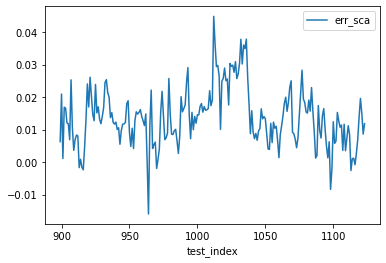

In [37]:
re_result.plot(x="test_index", y=[ "err_sca"])
plt.show()

In [39]:
norm_test = pd.read_csv(r'G:\MScProject\data\norm_test.csv')

In [40]:
norm_test

,Unnamed: 0,active_count,new_non_zero_count,receiving_count,balance_exchanges,balance_exchanges_relative,exchange_net_position_change,active_3m_6m,active_6m_12m,active_1y_2y,...,ssr_oscillator,network_capacity_sum,1_10_address,10-100-address,100-1k-address,1k-10k-address,10k+address,SMA_3,SMA_7,price_usd_close
0,0,1.000000,1.000000,1.000000,0.909431,0.923762,0.366969,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.164773,0.566667,1.0,1.0,1.000000,0.807034,1.000000
1,1,0.781507,0.821250,0.821063,1.000000,1.000000,1.000000,0.218086,0.822241,0.006842,...,0.120955,0.401354,0.247270,0.517045,1.000000,0.5,1.0,0.650578,0.793572,0.254052
2,2,0.145270,0.293541,0.271265,0.757621,0.755508,0.859389,0.247187,0.115047,0.789577,...,0.282551,0.592484,0.573323,0.000000,0.666667,1.0,1.0,0.346930,0.864599,0.314755
3,3,0.000000,0.000000,0.000000,0.630582,0.621937,0.554422,0.596055,0.019765,0.941310,...,0.055350,0.780833,0.726989,1.000000,0.400000,0.0,1.0,0.075794,1.000000,0.091190
4,4,0.605967,0.586272,0.637059,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,0.863636,0.000000,0.0,0.0,0.000000,0.000000,0.000000


In [42]:
#-----------------------------------------------------------------------------------------------------------------------#

In [43]:
#____________________________________________________________________test_______________________________________________#

In [83]:
from  glassnode  import  GlassnodeClient
import pandas as pd

api_key = "24vuPNOyd3ciclDMDBqFCoQFykc"
client = GlassnodeClient(api_key)
since = 1641052799 # 1/2/2022
until = 1646841599 # 9 3 2022
resolution = "24h"
params = {"a": "BTC", "s": since, "u": until, "i": resolution}
indlist = [['market','price_usd_close'],
          ['addresses','min_1_count'],
          ['addresses','min_10_count'],
          ['addresses','min_100_count'],
          ['addresses','min_1k_count'],
          ['addresses','min_10k_count'],
          ['addresses','active_count'],
          ['addresses','new_non_zero_count'],
           ['addresses','receiving_count'],
           #cant use
           ['distribution','supply_contracts'],
           ['distribution','balance_exchanges'],
           ['distribution','balance_exchanges_relative'],
           ['distribution','exchange_net_position_change'],
           #cant use
           ['supply','rcap_hodl_waves'],
           ['supply','active_3m_6m'],
           ['supply','active_6m_12m'],
           ['supply','active_1y_2y'],
           ['supply','active_2y_3y'],
           ['supply','active_3y_5y'],
           ['supply','profit_relative'],
           ['supply','profit_sum'],
           ['supply','loss_sum'],
           #do not have this data
           ['supply','sth_lth_realized_value_ratio'],
           #cant use
           ['transactions','count'],
           ['transactions','transfers_volume_exchanges_net'],
           ['market','mvrv'],
           ['market','mvrv_z_score'],
           ['market','marketcap_realized_usd'],
           ['indicators','pi_cycle_top'],
           ['indicators','net_unrealized_profit_loss'],
           ['indicators','seller_exhaustion_constant'],
           ['indicators','realized_profits_to_value_ratio'],
           ['indicators','realized_profit'],
           ['indicators','realized_loss'],
           ['indicators','ssr'],
           ['indicators','ssr_oscillator'],
           ['lightning','network_capacity_sum'],
           #cant use this data
           ['protocols','uniswap_volume_sum']
           #['',''],          
          ]


def data_from_api(indlist):
    data=[]
    for i in range(len(indlist)):
        try:
            label = indlist[i][1]
            db = client.get(indlist[i][0],indlist[i][1],params)
            #convert from list of dictionaries to data frame
            df = pd.DataFrame.from_dict(db,orient='columns')
            #setup columns name
            df.columns=['time',label]
            #fixed index
            df.set_index('time', inplace = True)
            data.append(df)
            data_df = pd.concat(data,axis = 1)
        except:
            print('data can be used',label)
    data_df['time'] = data_df.index
    data_df['time_real'] = pd.to_datetime(data_df['time'],unit = 's')
    #set time as the first columns
    data_df= data_df[['time_real']+[col for col in data_df if col != 'time']]
 #   df = df[ ['mean'] + [ col for col in df.columns if col != 'mean' ] ]
    return data_df


In [84]:
df_raw = data_from_api(indlist)
df_raw.tail(10)

data can be used supply_contracts
data can be used sth_lth_realized_value_ratio
data can be used uniswap_volume_sum


,time_real,price_usd_close,min_1_count,min_10_count,min_100_count,min_1k_count,min_10k_count,active_count,new_non_zero_count,receiving_count,...,pi_cycle_top,net_unrealized_profit_loss,seller_exhaustion_constant,realized_profits_to_value_ratio,realized_profit,realized_loss,ssr,ssr_oscillator,network_capacity_sum,time_real
time,,,,,,,,,,,,,,,,,,,,,
1645920000,2022-02-27,37721.433416,817389,145890,15724,2121,86,784024,367453,583494,...,"{'ma111': 47108.95672069468, 'ma350x2': 94740....",0.373368,0.041896,0.000809,3.691195e+08,3.812408e+08,"{'h': 10.254289443952047, 'l': 3.8328517666554...",-1.657779,3462.094445,2022-02-27
1646006400,2022-02-28,43204.601630,818343,146159,15929,2259,87,972259,434941,702581,...,"{'ma111': 46855.226781649166, 'ma350x2': 94636...",0.451574,0.047516,0.005433,2.485915e+09,1.438171e+09,"{'h': 10.253915844262476, 'l': 3.8083264749252...",-1.252811,3452.962035,2022-02-28
1646092800,2022-03-01,44348.196427,819397,146187,15924,2257,86,1060620,448208,723037,...,"{'ma111': 46645.697432626905, 'ma350x2': 94569...",0.464986,0.044745,0.002305,1.056286e+09,4.730939e+08,"{'h': 10.246748844060937, 'l': 3.7860550223486...",-1.162996,3451.179437,2022-03-01
1646179200,2022-03-02,43936.409710,819512,146145,15912,2259,86,1097551,461125,731814,...,"{'ma111': 46457.621945065075, 'ma350x2': 94499...",0.459597,0.043627,0.001539,7.058014e+08,4.164334e+08,"{'h': 10.241169135810493, 'l': 3.7631452328963...",-1.178918,3452.608921,2022-03-02
1646265600,2022-03-03,42459.603766,820169,146189,15924,2259,86,1010962,443106,701434,...,"{'ma111': 46267.84144367569, 'ma350x2': 94411....",0.440317,0.042880,0.001818,8.344851e+08,4.695205e+08,"{'h': 10.236687158361246, 'l': 3.7375436790221...",-1.271586,3458.292775,2022-03-03
1646352000,2022-03-04,39146.884469,820560,146263,15936,2258,86,959692,425650,675336,...,"{'ma111': 46060.01710877641, 'ma350x2': 94311....",0.393636,0.039759,0.000828,3.796075e+08,8.911781e+08,"{'h': 10.237051916427882, 'l': 3.7053489104903...",-1.479943,3469.173423,2022-03-04
1646438400,2022-03-05,39416.462688,820878,146163,15927,2259,86,810397,374116,595148,...,"{'ma111': 45832.15820921294, 'ma350x2': 94198....",0.397920,0.040735,0.000304,1.391163e+08,2.514143e+08,"{'h': 10.238781722942798, 'l': 3.6744693477767...",-1.441640,3474.354910,2022-03-05
1646524800,2022-03-06,38423.618936,821241,146329,15917,2257,86,776309,345450,555584,...,"{'ma111': 45597.23209418509, 'ma350x2': 94093....",0.382437,0.038481,0.000430,1.971127e+08,2.631914e+08,"{'h': 10.241166517925913, 'l': 3.6416148824697...",-1.495493,3479.461039,2022-03-06
1646611200,2022-03-07,38018.649505,821554,146292,15904,2256,85,918501,402703,648499,...,"{'ma111': 45394.209525023216, 'ma350x2': 93986...",0.376083,0.039743,0.001009,4.621819e+08,6.343059e+08,"{'h': 10.240701296154892, 'l': 3.6079676185859...",-1.508613,3485.402617,2022-03-07


In [85]:
# 选出 'rcap_hodl_waves','pi_cycle_top','ssr' 中的数据
df = df_raw.iloc[:,:].drop(columns = ['rcap_hodl_waves','pi_cycle_top','ssr'])

#features 处理
df['1_10_address'] =   df['min_1_count'] - df['min_10_count']
df['10-100-address'] = df['min_10_count'] - df['min_100_count']
df['100-1k-address'] = df['min_100_count'] - df['min_1k_count']
df['1k-10k-address'] = df['min_1k_count'] - df['min_10k_count']
df['10k+address'] =    df['min_10k_count']

df["per_1_d"] = df['price_usd_close'].pct_change(1)
df["per_3_d"] = df['price_usd_close'].pct_change(3)
df["per_7_d"] = df['price_usd_close'].pct_change(7)
df["per_15_d"] = df['price_usd_close'].pct_change(15)
df["per_30_d"] = df['price_usd_close'].pct_change(30)
df['price_back_1_d'] = df['price_usd_close'].shift(periods=1)
df['price_back_3_d'] = df['price_usd_close'].shift(periods=3)
df['price_back_7_d'] = df['price_usd_close'].shift(periods=7)
df['price_back_15_d'] = df['price_usd_close'].shift(periods=15)
df['price_back_30_d'] = df['price_usd_close'].shift(periods=30)
df['SMA_3'] = df['price_usd_close'].rolling(window=3).mean()
df['SMA_7'] = df['price_usd_close'].rolling(window=7).mean()
df['up_down'] = df["per_1_d"]
#condition = [(abs(df["per_1_d"])<0),(df["per_1_d"]>=0)]
condition = [(abs(df["per_1_d"])<0.005),(df["per_1_d"]<=-0.005),(df["per_1_d"]>=0.005)]
values = [-1,0,1]
import numpy as np
df['up_do_1d'] = np.select(condition,values)
#drop columns and store this dataset                                         
df1 = df.drop(['min_1_count','min_10_count','min_100_count','min_1k_count','min_10k_count'],axis=1)
#for SVM 1 day price prediction
df1 = df1.drop(['per_1_d','per_3_d','per_7_d','per_15_d','per_30_d','price_back_1_d','price_back_3_d','price_back_7_d','price_back_15_d','price_back_30_d'],axis=1)
#df1.iloc[30:,:]
#df1.to_csv(r'G:\MScProject\data\raw_add_col.csv')



In [86]:
#select No NAN rows
df2 = df1.iloc[30:,]
#split price , data columns
df2_up_do_1d = df2['up_do_1d']
df2_price_usd_close = df2['price_usd_close']
df2_time_real = df2['time_real']
df2_up_down = df2['up_down']

df2 = df2.drop(['up_do_1d','time_real','up_down'],axis = 1)



In [87]:
#remove the first 30 rows and the first  columns
#papare for normlization
# df2 = df1.iloc[30:,1:-2]
#prediction feature
# pre_df = df1.iloc[30:,-1]
#papare dataset 
df2
# normaliztion
price_re = df2['price_usd_close'].max()-df2['price_usd_close'].min()
price_min = df2['price_usd_close'].min()
norm_df=(df2-df2.min())/(df2.max()-df2.min())
norm_df.head(10)
# norm_df.shape

# change the first 'price_usd_close' to the last column
norm_df= norm_df[[col for col in norm_df if col != 'price_usd_close']+['price_usd_close']]
norm_df.head(10)

#set number as  index
index = [x for x in range(len(norm_df))]


In [125]:
#set number as  index
index = [x for x in range(len(norm_df))]
index = pd.Index(index)
norm_df = norm_df.set_index(index)
norm_df
# norm_df.to_csv(r'G:\MScProject\data\norm_test.csv')


,active_count,new_non_zero_count,receiving_count,balance_exchanges,balance_exchanges_relative,exchange_net_position_change,active_3m_6m,active_6m_12m,active_1y_2y,active_2y_3y,...,ssr_oscillator,network_capacity_sum,1_10_address,10-100-address,100-1k-address,1k-10k-address,10k+address,SMA_3,SMA_7,price_usd_close
0,0.712432,0.615089,0.668915,0.864076,0.910753,0.504724,0.000000,1.000000,0.000000,0.993013,...,0.152673,0.000000,0.013631,1.000000,1.000000,0.141026,0.75,0.095775,0.000000,0.199512
1,0.883661,0.688634,0.759009,0.962899,1.000000,0.520165,0.120984,0.991663,0.014306,0.989759,...,0.191938,0.037591,0.000000,0.160622,0.162651,0.070513,1.00,0.128552,0.046327,0.242344
2,0.646351,0.728797,0.716490,0.712269,0.752862,0.427300,0.124639,0.986722,0.023233,1.000000,...,0.000000,0.118682,0.014325,0.293610,0.120482,0.057692,1.00,0.077275,0.048160,0.000000
3,0.529296,0.630202,0.633507,0.663489,0.700286,0.441715,0.153902,0.964635,0.039225,0.978468,...,0.011934,0.143686,0.049054,0.302245,0.054217,0.044872,0.75,0.004476,0.044891,0.012308
4,0.405524,0.484966,0.562006,0.745035,0.773817,0.497290,0.157103,0.951603,0.064015,0.965843,...,0.470311,0.250427,0.071106,0.211572,0.180723,0.025641,0.50,0.142849,0.138806,0.598171
5,0.607180,0.626192,0.679412,0.705481,0.731196,0.348263,0.140182,0.921578,0.106762,0.960231,...,0.452316,0.262610,0.060427,0.199482,0.120482,0.025641,0.75,0.370673,0.221568,0.585849
6,0.459951,0.097480,0.108678,0.915634,0.927510,0.421975,0.165609,0.924617,0.115892,0.952290,...,0.556650,0.384882,0.063032,0.152850,0.108434,0.019231,0.75,0.643843,0.334340,0.714762
7,0.528211,0.586636,0.611297,0.410249,0.435889,0.176474,0.128662,0.949905,0.118345,0.907527,...,0.712029,0.447670,0.097413,0.114853,0.000000,0.089744,0.25,0.765718,0.472098,0.911574
8,0.775889,0.720835,0.745554,0.419081,0.438520,0.174021,0.149195,0.930239,0.130739,0.917084,...,0.714798,0.484499,0.085258,0.122625,0.048193,0.102564,0.25,0.901927,0.606317,0.936109
9,0.731962,0.658188,0.625470,0.245866,0.266488,0.115885,0.155866,0.866614,0.198335,0.984899,...,0.729076,0.455295,0.134485,0.050086,0.048193,0.096154,0.25,1.000000,0.793388,0.966957


In [126]:
n_steps = 2
X_test, y_test = split_sequences(norm_df, n_steps)
print(X_test.shape, y_test.shape)

(36, 2, 33) (36,)


In [127]:
len(X_test)

36

In [148]:
y_test_pred = model.predict(X_test)
# y_test_pred

In [150]:
y_test_pred = pd.DataFrame(y_test_pred)
y_test = pd.DataFrame(y_test)
result = pd.concat([y_test_pred,y_test],axis = 1)
result.columns = ['y_test_pred','y_test']
# result

In [151]:
#-----------------actual gap and predict gap-----------------#
result['y_test_pred'] = result['y_test_pred']* price_re + price_min
result['y_test'] = result['y_test']* price_re + price_min
result['gap_act'] = result['y_test']
result['gap_pred'] = result['y_test']
result['gap_act_err'] = result['y_test']
result['gap_pred_err'] = result['y_test']
for i in range(len(result)-1):
    result['gap_act'][i+1] = result['y_test'][i+1]-result['y_test'][i]
    result['gap_pred'][i+1] = result['y_test_pred'][i+1]-result['y_test'][i]
    result['gap_act_err'][i+1] = result['gap_act'][i+1]/result['y_test'][i]
    result['gap_pred_err'][i+1] = result['gap_pred'][i+1]/result['y_test'][i]
result = result[1:]
result

,y_test_pred,y_test,gap_act,gap_pred,gap_act_err,gap_pred_err
1,37246.660156,36924.102394,-1860.399904,-1537.842142,-0.047968,-0.039651
2,37081.343750,37018.587003,94.484608,157.241356,0.002559,0.004259
3,38886.226562,41516.072819,4497.485816,1867.639560,0.121493,0.050451
4,39583.125000,41421.476433,-94.596386,-1932.947819,-0.002279,-0.046559
5,40506.496094,42411.104290,989.627857,-914.980339,0.023892,-0.022090
6,42205.367188,43921.964378,1510.860088,-205.737103,0.035624,-0.004851
7,42939.941406,44110.316691,188.352312,-982.022972,0.004288,-0.022358
8,43584.109375,44347.120930,236.804239,-526.207316,0.005368,-0.011929
9,43334.917969,43548.071889,-799.049041,-1012.202961,-0.018018,-0.022825
10,42606.320312,42407.687662,-1140.384227,-941.751576,-0.026187,-0.021626


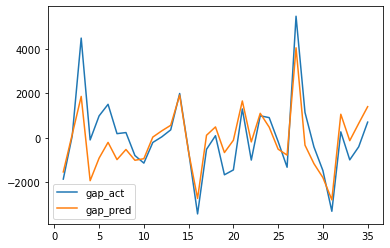

In [152]:
result.plot( y=["gap_act", "gap_pred"])
plt.show()

In [172]:
#create 3 classes actual error
condition = [(abs(result["gap_act_err"])<=0.005),(result["gap_act_err"]< -0.005),(result["gap_act_err"]> 0.005)]
values = [-1,0,1]
import numpy as np
result['gap_act_err_class_3'] = np.select(condition,values)

#create 3 classes prediction error
condition = [(abs(result["gap_pred_err"])<=-0.005),(result["gap_pred_err"]< -0.005),(result["gap_pred_err"]> 0.005)]
values = [-1,0,1]
import numpy as np
result['gap_pred_err_class_3'] = np.select(condition,values)

#create 3 classes actual error
condition = [(result["gap_act_err"])<=0,(result["gap_act_err"]>0)]
values = [-1,1]
import numpy as np
result['gap_act_err_class_2'] = np.select(condition,values)

#create 3 classes actual error
condition = [(result["gap_pred_err"]<=0),(result["gap_pred_err"]>0)]
values = [-1,1]
import numpy as np
result['gap_pred_err_class_2'] = np.select(condition,values)
result

,y_test_pred,y_test,gap_act,gap_pred,gap_act_err,gap_pred_err,gap_act_err_class_3,gap_pred_err_class_3,gap_act_err_class_2,gap_pred_err_class_2
1,37246.660156,36924.102394,-1860.399904,-1537.842142,-0.047968,-0.039651,0,0,-1,-1
2,37081.343750,37018.587003,94.484608,157.241356,0.002559,0.004259,-1,0,1,1
3,38886.226562,41516.072819,4497.485816,1867.639560,0.121493,0.050451,1,1,1,1
4,39583.125000,41421.476433,-94.596386,-1932.947819,-0.002279,-0.046559,-1,0,-1,-1
5,40506.496094,42411.104290,989.627857,-914.980339,0.023892,-0.022090,1,0,1,-1
6,42205.367188,43921.964378,1510.860088,-205.737103,0.035624,-0.004851,1,0,1,-1
7,42939.941406,44110.316691,188.352312,-982.022972,0.004288,-0.022358,-1,0,1,-1
8,43584.109375,44347.120930,236.804239,-526.207316,0.005368,-0.011929,1,0,1,-1
9,43334.917969,43548.071889,-799.049041,-1012.202961,-0.018018,-0.022825,0,0,-1,-1
10,42606.320312,42407.687662,-1140.384227,-941.751576,-0.026187,-0.021626,0,0,-1,-1


In [164]:
(result["gap_pred_err"][1]>- 0.005) and (result["gap_pred_err"][1]< 0.005)

False

In [177]:
# LSTM metrics
y_true=result['gap_act_err_class_3']
y_pred=result['gap_pred_err_class_3']

def LSTM_metric(y_true,y_pred):
    conf_matrix = confusion_matrix(y_true=y_true, y_pred=y_pred)
    acc = accuracy_score(y_true, y_pred)
    f1_weight = f1_score(y_true, y_pred,average = 'weighted')
    recall = recall_score(y_true, y_pred,average = 'weighted')
    precision = precision_score(y_true, y_pred, average='weighted')
    print(conf_matrix)
    print('Accuracy: %.3f' % acc )
    print('f1_weight: %.3f' % f1_weight )
    print('recall: %.3f' % recall )
    print('precision: %.3f' % precision )
LSTM_metric(y_true,y_pred)

[[ 0  5  2]
 [ 0 14  1]
 [ 0  4  9]]
Accuracy: 0.657
f1_weight: 0.583
recall: 0.657
precision: 0.539


In [119]:
condition = [(abs(result["actul_gap_err"])<0.005),(result["actul_gap_err"]<=-0.005),(result["actul_gap_err"]>=0.005)]
values = [-1,0,1]
import numpy as np
result['actul_gap_err'] = np.select(condition,values)
result = result[1:]

In [123]:
result["pre_next_val"] = result['y_test_pred'].pct_change(1)